<h1 style="text-align:center;color:tomato;">Wrangle and Analyze Data</h1>

## Importing the libraries

In [8]:
!pip3 install statsmodels

     |████████████████████████████████| 8.4MB 4.4MB/s eta 0:00:01     |█████████▍                      | 2.5MB 1.2MB/s eta 0:00:06
     |████████████████████████████████| 235kB 4.9MB/s eta 0:00:01


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import requests as req
import tweepy
import json
import re
import statsmodels.api as sm
import matplotlib.patches as mpatches

%matplotlib inline

<h1 style="text-align:center;color:tomato;"> Gathering of Data</h1>

#### Twitter Enhanced Dataset (Via local file)

In [11]:
df_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

In [58]:
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


# Image Predictions (Via url)

In [13]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
df_image_pred = pd.read_csv('image-predictions.tsv', sep='\t' )


In [14]:
df_img_pred.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Twitter API ( Via API)

In [15]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [16]:
#Storing list of tweets ids to get their content later
tweets_id=df_enhanced["tweet_id"]

In [17]:
#Creating a list to store tweet_ids which we fail to get content from (possibly deleted)
del_tweets=[]

#creating and opening file to write the data into
with open('tweet_json.txt',mode='w') as file:
    for uid in tweets_id:
        try:
            #fetching tweet content and storing it 
            tweet=api.get_status(uid,tweet_mode='extended')
            json.dump(tweet._json,file)
            #Writing new observation in a newline 
            file.write("\n")
        except:
            del_tweets.append(uid)
            print("Error fetching Tweet ID: ",uid)

Error fetching Tweet ID:  888202515573088257
Error fetching Tweet ID:  873697596434513921
Error fetching Tweet ID:  872668790621863937
Error fetching Tweet ID:  872261713294495745
Error fetching Tweet ID:  869988702071779329
Error fetching Tweet ID:  866816280283807744
Error fetching Tweet ID:  861769973181624320
Error fetching Tweet ID:  856602993587888130
Error fetching Tweet ID:  851953902622658560
Error fetching Tweet ID:  845459076796616705
Error fetching Tweet ID:  844704788403113984
Error fetching Tweet ID:  842892208864923648
Error fetching Tweet ID:  837366284874571778
Error fetching Tweet ID:  837012587749474308
Error fetching Tweet ID:  829374341691346946
Error fetching Tweet ID:  827228250799742977
Error fetching Tweet ID:  812747805718642688
Error fetching Tweet ID:  802247111496568832
Error fetching Tweet ID:  779123168116150273
Error fetching Tweet ID:  775096608509886464
Error fetching Tweet ID:  771004394259247104
Error fetching Tweet ID:  770743923962707968
Error fetc

In [18]:
#To understand how our extracted JSON format is 
with open('tweet_json.txt','r') as data:
    tweet_json = data.readline()
    print(tweet_json)

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 540, "h": 528, "resize": "fit"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "large": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media

In [19]:
#Converting our data into DataFrame
df_tweet=pd.read_json('tweet_json.txt',orient='records',lines=True)



In [20]:
df_tweet.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


#### Removing the unnecessary columns

In [21]:
df_tweet.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [22]:
df_tweet=df_tweet[["id","favorite_count","retweet_count","retweeted"]]
df_tweet.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,36276,7725,False
1,892177421306343426,31282,5712,False
2,891815181378084864,23550,3786,False
3,891689557279858688,39567,7878,False
4,891327558926688256,37787,8496,False



<h1 style="text-align:center;color:tomato;">Assessing Data</h1>

### Enhanced Dataset

In [23]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [24]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* Many Columns the datatype is wrong (for eg. in_reply_to,timestamp,retweeted_status_id tec.)
* Missing Values in dog stages columns (doggo,floofer,pupper,puppo) are registered as None
* Some Exapnded URL's are missing


In [25]:
df_enhanced.query('doggo=="None" and floofer=="None" and pupper=="None" and puppo=="None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


* Stages of dogs have not been mentioned and been names as "None"

In [26]:
df_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

* Sources are diificult to read and interpret

### Image Prediction Dataset

In [27]:
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [28]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


* No missing values as such

In [30]:
len(df_img_pred.query('p1_dog==False and p2_dog==False and p3_dog==False'))

324

* Some objects may not be dog at all as they have been failed to classified as dogs by the algorithm

### Twitter API

In [31]:
df_tweet

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,36276,7725,False
1,892177421306343426,31282,5712,False
2,891815181378084864,23550,3786,False
3,891689557279858688,39567,7878,False
4,891327558926688256,37787,8496,False
...,...,...,...,...
2326,666049248165822465,96,39,False
2327,666044226329800704,272,132,False
2328,666033412701032449,112,41,False
2329,666029285002620928,121,42,False


In [32]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id                2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
retweeted         2331 non-null bool
dtypes: bool(1), int64(3)
memory usage: 57.0 KB


In [33]:
df_tweet.describe()

,id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7575.935221,2709.610468
std,6.823170e+16,11758.237730,4582.474284
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1320.500000,548.000000
50%,7.182469e+17,3296.000000,1270.000000
75%,7.986692e+17,9273.500000,3148.000000
max,8.924206e+17,156513.000000,77989.000000


## Summary 


### Quality

#### df_enhanced
* Data types are wrongly written in many places
* Sources are not clearly understandable/readable
* Retweets are present in dataset
* Missing Values in dog stages columns (doggo,floofer,pupper,puppo) are registered as None
* Change all numerator to 10 and scale numerator accordingly for better comparison

#### df_image_pred
* Some images arent even dog by the algorithm but still classified as some
* Coverting the breed into categorical data

### Tideness

* Merging all the datasets into one
* Indiviual dogs stages columns need to be converted into a single categorical column
* Unnecessary columns need to be removed


<h1 style="text-align:center;color:tomato;">Data Cleaning</h1>

* First we will make make copies of the dataset

In [49]:
df_enhanced_clean=df_enhanced.copy()
df_img_pred_clean=df_img_pred.copy()
df_tweet_clean=df_tweet.copy()

## Quality

### 1.Twitter enhanced dataset


### 1.1 
#### Define
* Correcting the datatype in columns -timestamp,retweeted_status_timestamp and converting various id's to string datatype

#### Code
* Will use pd.to_datetime to convert into datatype and astype(str) to convert into string

In [50]:
# To datetime
df_enhanced_clean.timestamp = pd.to_datetime(df_enhanced_clean.timestamp)
df_enhanced_clean.retweeted_status_timestamp = pd.to_datetime(df_enhanced_clean.retweeted_status_timestamp)
# To string
df_enhanced_clean.in_reply_to_status_id=df_enhanced_clean.in_reply_to_status_id.astype(str)
df_enhanced_clean.in_reply_to_user_id=df_enhanced_clean.in_reply_to_user_id.astype(str)
df_enhanced_clean.retweeted_status_id=df_enhanced_clean.retweeted_status_id.astype(str)
df_enhanced_clean.retweeted_status_user_id=df_enhanced_clean.retweeted_status_user_id.astype(str)

#### Test

In [51]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtyp

### 1.2

#### Define 
* Removing the retweeted tweets. they are present in dataset and needs to be removed as they account for duplicate value 

#### Code 
* Remove the tweets which have no null status in retweet_status_id

In [52]:
df_enhanced_clean=df_enhanced_clean.query('retweeted_status_id == "nan"')

#### Test

In [53]:
len(df_enhanced_clean.query('retweeted_status_id != "nan"'))

0

### 1.3 


#### Define
* Missing values in dog are shown as none

#### Code
* Change the none into NAN 

In [39]:
df_enhanced_clean.floofer=df_enhanced_clean.floofer.replace("None",np.nan,regex=True)
df_enhanced_clean.pupper=df_enhanced_clean.pupper.replace("None",np.nan,regex=True)
df_enhanced_clean.doggo=df_enhanced_clean.doggo.replace("None",np.nan,regex=True)
df_enhanced_clean.puppo=df_enhanced_clean.puppo.replace("None",np.nan,regex=True)

#### Test

In [40]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns, UTC]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datet

### 1.4

#### Define 

* Types of sources not human readable/clearly understood, since they are written in HTML tags format, it is difficult for a normal person to understand.

####  Code

* Extract the text between the anchor tags to extract the actual source used

In [45]:
def source(x):
    source_list=[]
    pattern = re.compile('llow">(.*?)</a>')
    for tag in x['source']:
        m = re.search(pattern, tag)
        src=m.group(1)
        source_list.append(src)
    return source_list

src=source(df_enhanced_clean)
df_enhanced_clean['source']=src

#### Test

In [47]:
df_enhanced_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### 1.5

#### Define 

* Some of the expanded URLs are missing. I found out from the Twitter API Documentation,tweet_id is an extention to 'https://twitter.com/dog_rates/status/' which gives us the URL to the tweet we are looking at

#### Code 

* For places where expanded URL is null, we will add the https://twitter.com/dog_rates/status/ and tweet_id column, and convert into a string to store in.(We will be using pandas apply function)

In [60]:
def form_link(x):
    if pd.notnull(x['expanded_urls']):
        return x
    else:
        tid = x['tweet_id']
        x['expanded_urls'] = 'https://twitter.com/dog_rates/status/' +str(tid)
        return x


df_enhanced_clean = df_enhanced_clean.apply(form_link, axis=1)

#### Test

In [61]:
df_enhanced_clean[df_enhanced_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 1.6
#### Define 

* We can bring the denominator to 10 and asjust the numberator accordingly

#### Code

* We will divide the numerator column by the denominator column and then multiply it by 10 to get the rating out of ten, and then drop the denominator column which will no longer be needed

In [62]:
df_enhanced_clean.rating_numerator=(df_enhanced_clean.rating_numerator/df_enhanced_clean.rating_denominator)*10



In [63]:
df_enhanced_clean[df_enhanced_clean['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,nan,nan,NaT,https://twitter.com/dog_rates/status/835246439...,inf,0,None,None,None,None,None
342,832088576586297345,8.320875475599974e+17,30582082.0,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,nan,nan,NaT,https://twitter.com/dog_rates/status/832088576...,7.333333,15,None,None,None,None,None
433,820690176645140481,nan,nan,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,nan,nan,NaT,https://twitter.com/dog_rates/status/820690176...,12.000000,70,None,None,None,None,None
516,810984652412424192,nan,nan,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,nan,nan,NaT,"https://www.gofundme.com/sams-smile,https://tw...",34.285714,7,Sam,None,None,None,None
902,758467244762497024,nan,nan,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,nan,nan,NaT,https://twitter.com/dog_rates/status/758467244...,11.000000,150,None,None,None,None,None
1068,740373189193256964,nan,nan,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",nan,nan,NaT,https://twitter.com/dog_rates/status/740373189...,8.181818,11,None,None,None,None,None
1120,731156023742988288,nan,nan,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,nan,nan,NaT,https://twitter.com/dog_rates/status/731156023...,12.000000,170,this,None,None,None,None
1165,722974582966214656,nan,nan,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,nan,nan,NaT,https://twitter.com/dog_rates/status/722974582...,2.000000,20,None,None,None,None,None
1202,716439118184652801,nan,nan,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,nan,nan,NaT,https://twitter.com/dog_rates/status/716439118...,10.000000,50,Bluebert,None,None,None,None
1228,713900603437621249,nan,nan,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,nan,nan,NaT,https://twitter.com/dog_rates/status/713900603...,11.000000,90,None,None,None,None,None


In [64]:
df_enhanced_clean.loc[2335,'rating_numerator']=9
df_enhanced_clean.loc[313,'rating_numerator']=13

In [65]:
df_enhanced_clean.drop(['rating_denominator'],axis=1,inplace=True)

#### Test

In [66]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null object
retweeted_status_user_id      2175 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2175 non-null object
rating_numerator              2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(

### 2. Image Prediction Dataset

### 2.1

#### Define 

There are some cases when the algorithm has predicted that the given image is not a dog

#### Code

Filter out the instances where the algortihm predicts that the image is not of a dog in all 3 instances

In [67]:
df_img_pred_clean=df_img_pred_clean.query('p1_dog == True or p2_dog == True or p3_dog == True')

#### Test

In [71]:
len(df_img_pred_clean.query('p1_dog == False and p2_dog == False and p3_dog == False'))

0

### 2.2

#### Define 

Dogs Breeds are mentioned as strings but they are categorical data

#### Code

Convert datatype into category

In [72]:
df_img_pred_clean['p1']=df_img_pred_clean['p1'].astype('category')
df_img_pred_clean['p2']=df_img_pred_clean['p2'].astype('category')
df_img_pred_clean['p3']=df_img_pred_clean['p3'].astype('category')

#### Test

In [73]:
df_img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
img_num     1751 non-null int64
p1          1751 non-null category
p1_conf     1751 non-null float64
p1_dog      1751 non-null bool
p2          1751 non-null category
p2_conf     1751 non-null float64
p2_dog      1751 non-null bool
p3          1751 non-null category
p3_conf     1751 non-null float64
p3_dog      1751 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 146.5+ KB


### 2.3 

#### Define 

Breed names are not capatalized and there are underscore between some breed names.

#### Code 

Capitalising every string under columns p1,p2,p3 using pandas  .capitalize() function and also removing the underscore with python str.replace function

In [68]:
#Capitalizing Breed Names
df_img_pred_clean['p1'] = df_img_pred_clean.p1.str.capitalize()
df_img_pred_clean['p2'] = df_img_pred_clean.p2.str.capitalize()
df_img_pred_clean['p3'] = df_img_pred_clean.p3.str.capitalize()

In [69]:
#Replacing _ with ' ' in the columns
df_img_pred_clean['p1']=df_img_pred_clean['p1'].replace("_",r' ',regex=True)
df_img_pred_clean['p2']=df_img_pred_clean['p2'].replace("_",r' ',regex=True)
df_img_pred_clean['p3']=df_img_pred_clean['p3'].replace("_",r' ',regex=True)

#### Test

In [70]:
df_img_pred_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Tidiness

### Twitter Enhaced Dataset

### 1.1

#### Define
Removing some non useful columns  





#### Code

In [77]:
df_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [75]:

df_enhanced_clean.drop(['retweeted_status_timestamp','retweeted_status_user_id','retweeted_status_id'],axis=1,inplace=True)


#### Test

In [78]:
df_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

### 1.2 

<b> Define </b>

The different stages of dogs are expanded as different variables in the dataset whereas in reality its a should be a single categorical value denoting the stage of a dog

<b> Code </b>

While keeping other columns constant, the columns ('doggo' ,'floofer', 'pupper', 'puppo') will be melted into one column

We have to keep in mind that one dog can be in more than one stage since the terms are vaguely defined`

In [79]:
# Create new column for dog stages 
df_enhanced_clean['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    if len(stage)==0: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # If there is more than 1 stage
        row['dog_stage'] = ','.join(stage)
    
    return row

df_enhanced_clean = df_enhanced_clean.apply(dog_stage, axis=1)



In [80]:
df_enhanced_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

#### Test

In [81]:
df_enhanced_clean.dog_stage.value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

### 2.0

#### Define 

Creating a Master Dataset

#### Code 

Merging all tables using tweet_id as the primary key and by inner join, so we have a tight dataset of tweets for which we have all data available

In [82]:
df_tweet_clean.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,36276,7725,False
1,892177421306343426,31282,5712,False
2,891815181378084864,23550,3786,False
3,891689557279858688,39567,7878,False
4,891327558926688256,37787,8496,False


In [83]:
df_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None


In [84]:
df_master_1=pd.merge(left=df_enhanced_clean,right=df_tweet_clean,left_on='tweet_id',right_on='id',how='inner')

In [85]:
df_master_1.drop(['id','retweeted'],axis=1,inplace=True)
df_master_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None,36276,7725
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,31282,5712
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,23550,3786
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,39567,7878
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,37787,8496


In [86]:
df_master=pd.merge(left=df_master_1,right=df_img_pred_clean,on='tweet_id',how='inner')

#### Test

In [88]:
df_master.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,...,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False


In [89]:
df_master.shape

(1679, 23)

In [90]:
#Changing source into category
df_master['source']=df_master['source'].astype('category')
df_master['dog_stage']=df_master['dog_stage'].astype('category')

df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1679 entries, 0 to 1678
Data columns (total 23 columns):
tweet_id                 1679 non-null int64
in_reply_to_status_id    1679 non-null object
in_reply_to_user_id      1679 non-null object
timestamp                1679 non-null datetime64[ns, UTC]
source                   1679 non-null category
text                     1679 non-null object
expanded_urls            1679 non-null object
rating_numerator         1679 non-null float64
name                     1679 non-null object
dog_stage                1679 non-null category
favorite_count           1679 non-null int64
retweet_count            1679 non-null int64
jpg_url                  1679 non-null object
img_num                  1679 non-null int64
p1                       1679 non-null category
p1_conf                  1679 non-null float64
p1_dog                   1679 non-null bool
p2                       1679 non-null category
p2_conf                  1679 non-null float64
p

## Storing the dataset externally

In [91]:
df_master.to_csv('twitter_archive_master.csv',index=False)

In [93]:
df=pd.read_csv('twitter_archive_master.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,...,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False


<h1 style="color:tomato;text-align:center">Analysis</h1>

## Q1) Breed of Dog which recieve more retweets?

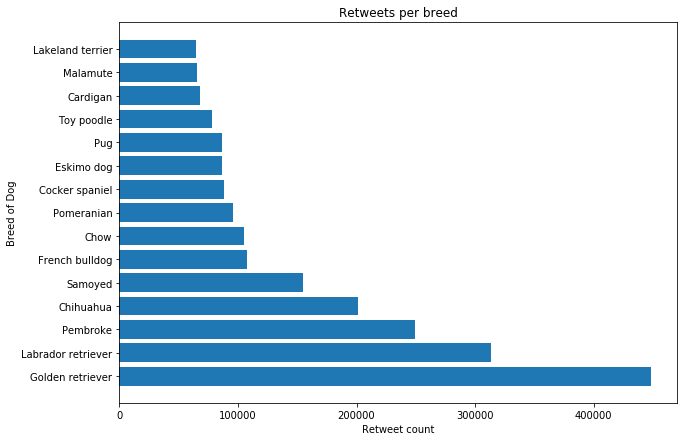

In [100]:
df_1 = df_master.groupby('p1')['retweet_count'].sum().reset_index()
df_sorted = df_favorite.sort_values('retweet_count', ascending=False).head(15)
retweet = df_sorted['retweet_count']
breed = df_sorted['p1']

fig, ax = plt.subplots(figsize=(10,7))
fav = plt.barh(breed, retweet)

plt.ylabel('Breed of Dog')
plt.xlabel('Retweet count')
plt.title('Retweets per breed');

> * Golden Retriver has the most number of retweets as evident from the above plot
* The retweets range from 100k to 500k

## Q2)What are number of favorites by the breed

Text(0.5, 1.0, 'Number of Favorites by Breed')

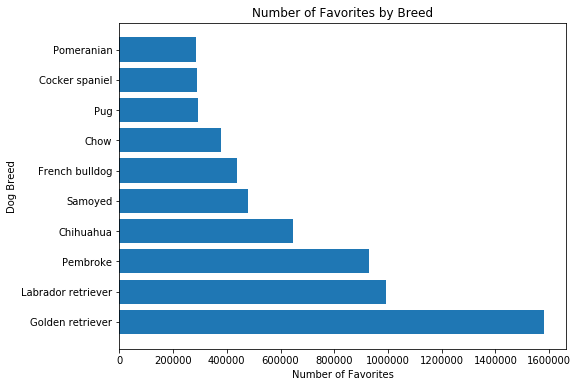

In [103]:
df_favorite = df.groupby('p1')['favorite_count'].sum().reset_index()
df_sorted = df_favorite.sort_values('favorite_count', ascending=False).head(10)
ser_fav = df_sorted['favorite_count']
ser_breed = df_sorted['p1']
#E90552
fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(ser_breed, ser_fav)
plt.ylabel('Dog Breed')
plt.xlabel('Number of Favorites')
plt.title('Number of Favorites by Breed')


>* As we can see from the graph Golden Retriever is the most favortite dog 
* Every breed listed here  had atleast over 200K favorites and peaked at over 1.6 Million


## Q3)Is there a correlation between favorites and retweets?

In [105]:
!pip3 install seaborn

     |████████████████████████████████| 225kB 1.6MB/s eta 0:00:01


In [106]:
import seaborn as sb

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


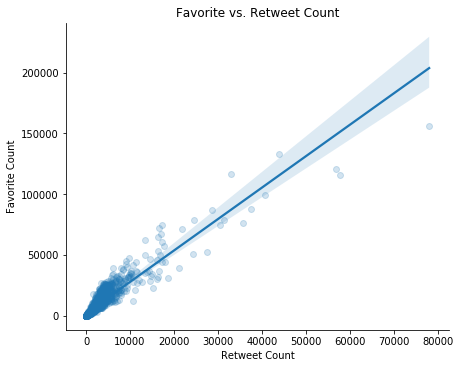

In [107]:

# Plot scatterplot of retweet vs favorite count
sb.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_master,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

> As we can see there is a high correlation between favorites and retweet count

## Q4) What are most popular dog names?

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  """Entry point for launching an IPython kernel.


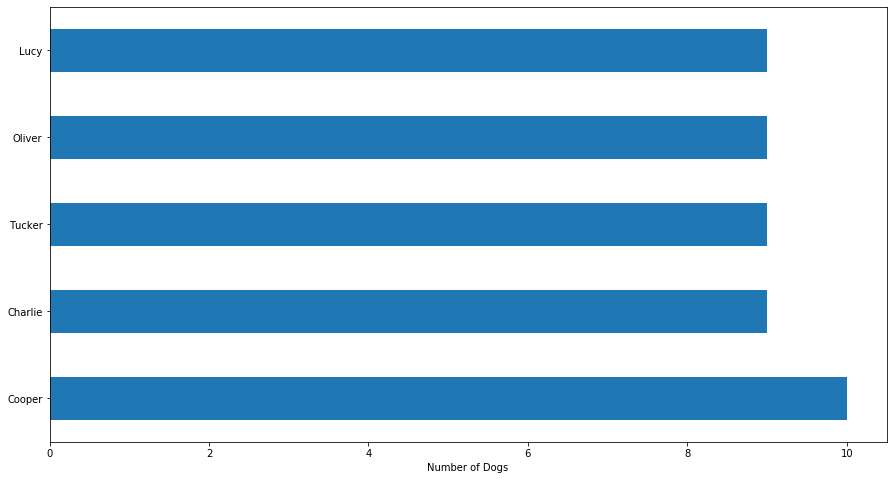

In [115]:
df_master.name.value_counts()[2:7].plot('barh', figsize=(15,8))
plt.title='Most Common Dog Names'
plt.xlabel("Number of Dogs");

> We found out that Cooper is the most widely used dog name out of the name data that was available

## Q5) What are Proportion of various dog stages?

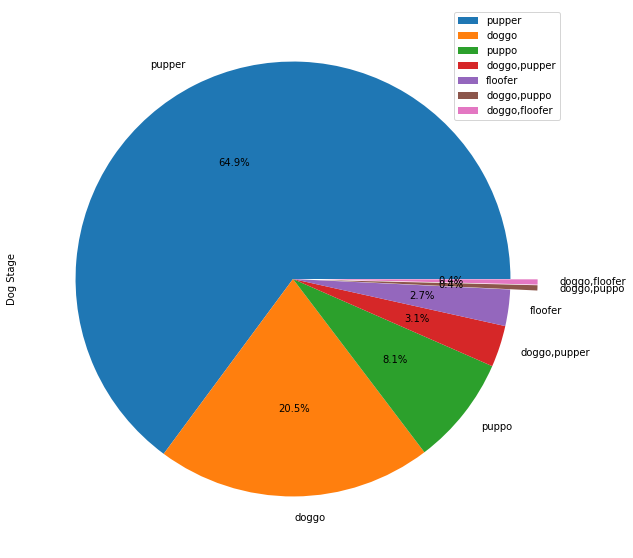

In [142]:
df_stages = df[df['dog_stage'] != "None"]
fig, ax = plt.subplots(figsize=(10,10))

df_stages['dog_stage'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%',explode=[0,0,0,0,0,0.125,0.125])
plt.legend();

>I first removed the values and then  created a pie chart to see what was the distribution of dog_stages among the WeRateDogs' Dog population

>* More than half of it was covered by puppers: These are the dogs which are still in training hence a bit immature
* 1/5th of the population was covered by the more mature Doggo population
